Grupo conformado por:
Edgar Andrés García Hernández - 200512532
John Pablo Calvo López - 201726690

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    if 1<=a<=15 and 1<=b<=15:
        result=int(str(pi)[a+1])*int(str(pi)[b+1])
    else:
        result="Error"
    # Add the solution here
    
    return result

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

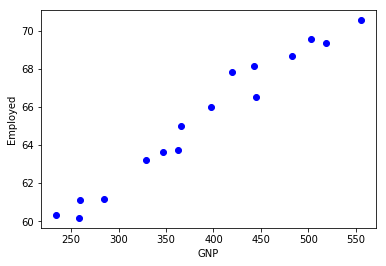

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

Employed = 51.84358978188415+ [0.03475229]*GNP


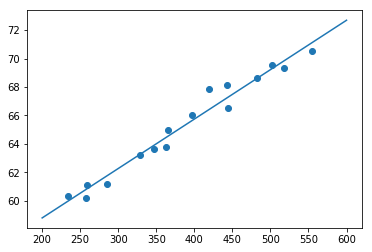

In [8]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(fit_intercept=True)
gnp=data[:,2]
employed=data[:,1]

modelo.fit(gnp[:,np.newaxis], employed)

xfit = np.linspace(200,600)
yfit = modelo.predict(xfit[:, np.newaxis])

plt.scatter(gnp,employed)
plt.plot(xfit,yfit);

print("Employed = "+str(modelo.intercept_)+"+ "+str(modelo.coef_)+"*GNP")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [9]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [10]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [11]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [12]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

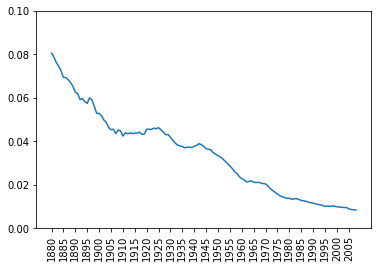

In [13]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

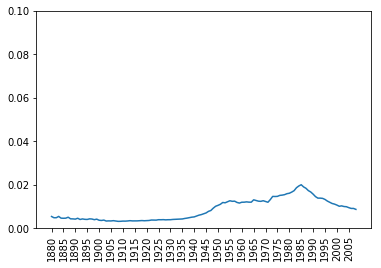

In [14]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [15]:
# Con esto, se crea una variable década para las décadas asociadas a cada año
boys["decade"] = 10 * (boys['year'] // 10)
# A continuación, se crea una tabla dinámica con las sumas de las proporciones de cada nombre según la década
boys2=pd.pivot_table(boys, index='name',columns="decade",values="prop", aggfunc=np.sum)
# Finalmente, se imprime el nombre más común de cada década
for x in range(1880,2001,10):
    print("El nombre más común en los años "+str(x)+" fue "+boys2.loc[boys2[x].idxmax()].name)

El nombre más común en los años 1880 fue John
El nombre más común en los años 1890 fue John
El nombre más común en los años 1900 fue John
El nombre más común en los años 1910 fue John
El nombre más común en los años 1920 fue Robert
El nombre más común en los años 1930 fue Robert
El nombre más común en los años 1940 fue James
El nombre más común en los años 1950 fue James
El nombre más común en los años 1960 fue Michael
El nombre más común en los años 1970 fue Michael
El nombre más común en los años 1980 fue Michael
El nombre más común en los años 1990 fue Michael
El nombre más común en los años 2000 fue Jacob


# Exercise 01.4

Which has been the most popular girl name?


In [16]:
print("Existen registros para "+str(len(girls.year.unique()))+" años")

Existen registros para 129 años


In [18]:
nina1=pd.pivot_table(girls,index="name",values="prop",aggfunc=np.sum)
# Se ordenan los valores de mayor a menor
nina1=nina1.sort_values("prop",ascending=False)/129
# El valor obtenido en la tabla dinámica se divide por 129, dado que es el número de años con registros.
# Esto se debe a que la tabla dinámica sumó los valores de "prop" según el nombre, sin dividir
# A continuación, se obtiene el valor más alto, el cual sería la primera fila de la tabla
nina1.iloc[0]

prop    0.034976
Name: Mary, dtype: float64

In [27]:
print("De acuerdo con lo anterior, el nombre más común de niña a lo largo del tiempo fue "+nina1.iloc[0].name+", con "+str(round(nina1.iloc[0].prop*100,3))+"% de las niñas")

De acuerdo con lo anterior, el nombre más común de niña a lo largo del tiempo fue Mary, con 3.498% de las niñas


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [30]:
# Se crea un subconjunto para las niñas nacidas del año 2000 en adelante
girls2=girls[girls["year"]>=2000]

In [36]:
# Se crea una base de datos "duplicate", con los nombres que aparecen en el año 2000 y una columna adicional llamada duplicate
duplicate=pd.concat([girls2["name"],girls2["name"].isin(girls["name"][girls["year"]<2000])],axis=1)
duplicate.columns=["name","duplicate"]
duplicate.set_index("name")

print("Con esto se guarda una columna en la cual se verifica si el nombre existía antes de la década del 2000 o no."+
      " True indica que el nombre existía antes del 2000, False indica que el nombre es nuevo")
# Con esto se guarda una columna en la cual se verifica si el nombre existía antes de la década del 2000 o no.
# True indica que el nombre existía antes del 2000. False indica que el nombre es nuevo.

Con esto se guarda una columna en la cual se verifica si el nombre existía antes de la década del 2000 o no. True indica que el nombre existía antes del 2000, False indica que el nombre es nuevo


In [32]:
# Con esto se crea una tabla dinámica, la cual se usa para revisar los promedios en las proporciones de los nombres para la década
# Se usa sum en lugar de average debido a la posibilidad de años en los cuales el nombre no fue utilizado, distorsionando el promedio

nina2=pd.pivot_table(girls2, index='name', aggfunc=np.sum)
nina2=nina2.drop(columns=["year"])

# Como la información va hasta 2008, se dice que la década tiene 9 años. Por eso se divide por 9
nina2["prop"]=nina2["prop"]/9
nina2=nina2.sort_values("prop",ascending=False)

# Acá, se seleccionan únicamente los valores que tienen valores falsos en "duplicate", indicando los nombres nuevos
nina2=nina2.loc[duplicate["name"][duplicate["duplicate"]==False]]
nina2=pd.pivot_table(nina2, index='name', aggfunc=np.average)
nina2=nina2.sort_values("prop",ascending=False)
nina2.iloc[0]

prop    0.001709
Name: Nevaeh, dtype: float64

In [35]:
print("De acuerdo con lo anterior, el nombre nuevo de niña más popular fue "+nina2.iloc[0].name+", con "+str(round(nina2.iloc[0].prop*100,3))+"% de las niñas nacidas en esa década")

De acuerdo con lo anterior, el nombre nuevo de niña más popular fue Nevaeh, con 0.171% de las niñas nacidas en esa década
